In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from datetime import datetime, timedelta
from time import sleep
import json
import urllib
import subprocess
import array
from matplotlib import cm
import itertools

In [3]:
from I3Tray import I3Tray
from icecube import dataclasses, dataio, icetray
#from icecube.taxi_reader import taxi_tools
from icecube.icetray.i3logging import *
#from icecube.taxi_reader.taxi_tools import *

# New code (parsing both .bin and .i3 files)

In [4]:
### With new TAXI code
## Extracting data from .bin files
## For additional details, look at the taxi_tools module

from icecube import radcube
from icecube.taxi_reader import taxi_tools
data, rois, trace_lengths, rtc_times = taxi_tools.parse_bin_file('/data/user/ibrewer/taxi_data/07_12_23_Ant2_Ch0/200MHz_500mV.bin', applyCorrections=False)
data = taxi_tools.multievent_trace_tailor(data, rois, trace_lengths)

print(data.shape) # Returns (number of traces, antenna, channel, length of each trace)

(381, 3, 2, 4096)


WARN (Python): Waveform length is zero, cannot run the tailor on this waveform! (taxi_tools.py:154 in antenna_tailor_stable)
WARN (Python): Waveform length is zero, cannot run the tailor on this waveform! (taxi_tools.py:154 in antenna_tailor_stable)
WARN (Python): Waveform length is zero, cannot run the tailor on this waveform! (taxi_tools.py:154 in antenna_tailor_stable)


In [44]:
# Run this script only if you need to convert from .bin to .i3 files
from icecube import dataclasses, dataio, icetray
from icecube.icetray.i3logging import log_info, log_debug, log_warn, log_fatal
from icecube.taxi_reader import taxi_tools
from icecube.taxi_reader.data_processing import i3_converter


## Right now just define serdes_delay and serdes_timestamps as None b/c I don't think they are needed...
i3_converter.radio2i3('/data/user/ibrewer/taxi_data/07_12_23_Ant2_Ch0/200MHz_500mV.bin', '/data/user/ibrewer/taxi_data/07_12_23_Ant2_Ch0/200MHz_500mV.i3', serdes_delay=None, serdes_timestamps=None)

WARN (Python): The year could not be extracted from this file, will use today's year (i3_converter.py:227 in radio2i3)
WARN (Python): Waveform length is zero, cannot run the tailor on this waveform! (taxi_tools.py:154 in antenna_tailor_stable)
WARN (Python): Waveform length is zero, cannot run the tailor on this waveform! (taxi_tools.py:154 in antenna_tailor_stable)
WARN (Python): Waveform length is zero, cannot run the tailor on this waveform! (taxi_tools.py:154 in antenna_tailor_stable)
WARN (Python): Cannot get the date based on the filename /data/user/ibrewer/taxi_data/07_12_23_Ant2_Ch0/200MHz_500mV.bin. Will use ficticious date (taxi_tools.py:290 in make_conversion_to_utc)


In [79]:
## Converting all files in a directory from .bin to .i3

from icecube import dataclasses, dataio, icetray
from icecube.icetray.i3logging import log_info, log_debug, log_warn, log_fatal
from icecube.taxi_reader import taxi_tools
from icecube.taxi_reader.data_processing import i3_converter
path = '/data/user/ibrewer/taxi_data/07_12_23_Ant2_Ch0/'
file_list = os.listdir(path)
    
for file in file_list:

    if file.split('.')[1] == 'bin':
        
        i3_converter.radio2i3(path+file, path+file.strip('.bin')+'.i3', serdes_delay=None, serdes_timestamps=None)

WARN (Python): The year could not be extracted from this file, will use today's year (i3_converter.py:227 in radio2i3)
WARN (Python): Cannot get the date based on the filename /data/user/ibrewer/taxi_data/07_12_23_Ant2_Ch0/140MHz_200mV.bin. Will use ficticious date (taxi_tools.py:290 in make_conversion_to_utc)
WARN (Python): Pre-mature header detected. 3158 blocks expected (File.py:126 in _read_event)
WARN (Python): The year could not be extracted from this file, will use today's year (i3_converter.py:227 in radio2i3)
WARN (Python): Cannot get the date based on the filename /data/user/ibrewer/taxi_data/07_12_23_Ant2_Ch0/170MHz_200mV.bin. Will use ficticious date (taxi_tools.py:290 in make_conversion_to_utc)
WARN (Python): Pre-mature header detected. 3158 blocks expected (File.py:126 in _read_event)
WARN (Python): The year could not be extracted from this file, will use today's year (i3_converter.py:227 in radio2i3)
WARN (Python): Cannot get the date based on the filename /data/user/ibr

WARN (Python): The year could not be extracted from this file, will use today's year (i3_converter.py:227 in radio2i3)
WARN (Python): Cannot get the date based on the filename /data/user/ibrewer/taxi_data/07_12_23_Ant2_Ch0/320MHz_100mV.bin. Will use ficticious date (taxi_tools.py:290 in make_conversion_to_utc)
WARN (Python): The year could not be extracted from this file, will use today's year (i3_converter.py:227 in radio2i3)
WARN (Python): Waveform length is zero, cannot run the tailor on this waveform! (taxi_tools.py:154 in antenna_tailor_stable)
WARN (Python): Waveform length is zero, cannot run the tailor on this waveform! (taxi_tools.py:154 in antenna_tailor_stable)
WARN (Python): Waveform length is zero, cannot run the tailor on this waveform! (taxi_tools.py:154 in antenna_tailor_stable)
WARN (Python): Waveform length is zero, cannot run the tailor on this waveform! (taxi_tools.py:154 in antenna_tailor_stable)
WARN (Python): Waveform length is zero, cannot run the tailor on this

WARN (Python): The year could not be extracted from this file, will use today's year (i3_converter.py:227 in radio2i3)
WARN (Python): Waveform length is zero, cannot run the tailor on this waveform! (taxi_tools.py:154 in antenna_tailor_stable)
WARN (Python): Waveform length is zero, cannot run the tailor on this waveform! (taxi_tools.py:154 in antenna_tailor_stable)
WARN (Python): Waveform length is zero, cannot run the tailor on this waveform! (taxi_tools.py:154 in antenna_tailor_stable)
WARN (Python): Cannot get the date based on the filename /data/user/ibrewer/taxi_data/07_12_23_Ant2_Ch0/260MHz_500mV.bin. Will use ficticious date (taxi_tools.py:290 in make_conversion_to_utc)
WARN (Python): Pre-mature header detected. 3158 blocks expected (File.py:126 in _read_event)
WARN (Python): The year could not be extracted from this file, will use today's year (i3_converter.py:227 in radio2i3)
WARN (Python): Waveform length is zero, cannot run the tailor on this waveform! (taxi_tools.py:154 in

WARN (Python): Cannot get the date based on the filename /data/user/ibrewer/taxi_data/07_12_23_Ant2_Ch0/170MHz_400mV.bin. Will use ficticious date (taxi_tools.py:290 in make_conversion_to_utc)
WARN (Python): The year could not be extracted from this file, will use today's year (i3_converter.py:227 in radio2i3)
WARN (Python): Waveform length is zero, cannot run the tailor on this waveform! (taxi_tools.py:154 in antenna_tailor_stable)
WARN (Python): Waveform length is zero, cannot run the tailor on this waveform! (taxi_tools.py:154 in antenna_tailor_stable)
WARN (Python): Waveform length is zero, cannot run the tailor on this waveform! (taxi_tools.py:154 in antenna_tailor_stable)
WARN (Python): Cannot get the date based on the filename /data/user/ibrewer/taxi_data/07_12_23_Ant2_Ch0/200MHz_100mV.bin. Will use ficticious date (taxi_tools.py:290 in make_conversion_to_utc)
WARN (Python): The year could not be extracted from this file, will use today's year (i3_converter.py:227 in radio2i3)
W

WARN (Python): The year could not be extracted from this file, will use today's year (i3_converter.py:227 in radio2i3)
WARN (Python): Cannot get the date based on the filename /data/user/ibrewer/taxi_data/07_12_23_Ant2_Ch0/50MHz_400mV.bin. Will use ficticious date (taxi_tools.py:290 in make_conversion_to_utc)
WARN (Python): The year could not be extracted from this file, will use today's year (i3_converter.py:227 in radio2i3)
WARN (Python): Waveform length is zero, cannot run the tailor on this waveform! (taxi_tools.py:154 in antenna_tailor_stable)
WARN (Python): Waveform length is zero, cannot run the tailor on this waveform! (taxi_tools.py:154 in antenna_tailor_stable)
WARN (Python): Waveform length is zero, cannot run the tailor on this waveform! (taxi_tools.py:154 in antenna_tailor_stable)
WARN (Python): Cannot get the date based on the filename /data/user/ibrewer/taxi_data/07_12_23_Ant2_Ch0/110MHz_100mV.bin. Will use ficticious date (taxi_tools.py:290 in make_conversion_to_utc)
WA

WARN (Python): The year could not be extracted from this file, will use today's year (i3_converter.py:227 in radio2i3)
WARN (Python): Waveform length is zero, cannot run the tailor on this waveform! (taxi_tools.py:154 in antenna_tailor_stable)
WARN (Python): Waveform length is zero, cannot run the tailor on this waveform! (taxi_tools.py:154 in antenna_tailor_stable)
WARN (Python): Waveform length is zero, cannot run the tailor on this waveform! (taxi_tools.py:154 in antenna_tailor_stable)
WARN (Python): Waveform length is zero, cannot run the tailor on this waveform! (taxi_tools.py:154 in antenna_tailor_stable)
WARN (Python): Waveform length is zero, cannot run the tailor on this waveform! (taxi_tools.py:154 in antenna_tailor_stable)
WARN (Python): Waveform length is zero, cannot run the tailor on this waveform! (taxi_tools.py:154 in antenna_tailor_stable)
WARN (Python): Waveform length is zero, cannot run the tailor on this waveform! (taxi_tools.py:154 in antenna_tailor_stable)
WARN (

WARN (Python): The year could not be extracted from this file, will use today's year (i3_converter.py:227 in radio2i3)
WARN (Python): Cannot get the date based on the filename /data/user/ibrewer/taxi_data/07_12_23_Ant2_Ch0/50MHz_500mV.bin. Will use ficticious date (taxi_tools.py:290 in make_conversion_to_utc)
WARN (Python): The year could not be extracted from this file, will use today's year (i3_converter.py:227 in radio2i3)
WARN (Python): Cannot get the date based on the filename /data/user/ibrewer/taxi_data/07_12_23_Ant2_Ch0/200MHz_300mV.bin. Will use ficticious date (taxi_tools.py:290 in make_conversion_to_utc)
WARN (Python): The year could not be extracted from this file, will use today's year (i3_converter.py:227 in radio2i3)
WARN (Python): Cannot get the date based on the filename /data/user/ibrewer/taxi_data/07_12_23_Ant2_Ch0/200MHz_200mV.bin. Will use ficticious date (taxi_tools.py:290 in make_conversion_to_utc)
WARN (Python): The year could not be extracted from this file, wi

In [4]:
## A module for analyzing .i3 files
## If you want to use AnalyzeTAXIData, then you have to convert from .bin to .i3

#log_info("This function runs once per frame")

#thisROI = frame['RadioAntennaROI'].value  #This is the ROI for this event
#thisTime = frame["RadioTaxiTime"].value   #The RPC time in I3 units

from icecube.icetray import I3Units
from icecube.taxi_reader import taxi_tools

from I3Tray import *
from icecube import icetray, dataio, dataclasses, taxi_reader, radcube
from icecube.icetray.i3logging import *
from matplotlib import cm

AverageSpectrum = []

class AnalyzeTAXIData(icetray.I3Module):

    def __init__(self,ctx):
        icetray.I3Module.__init__(self,ctx)
        
    def Configure(self):

        self.NAntennas = 3
        self.NArms = 2
        self.NTimeBins = int(1024)
        self.NFreqBins = int(self.NTimeBins / 2 + 1)

        global AverageSpectrum
        AverageSpectrum = [[[[] for i in range(self.NFreqBins)] for i in range(self.NArms)] for i in range(self.NAntennas)]
#         np.zeros((self.NAntennas, self.NArms, self.NFreqBins))
#       
        global AverageTimeSeries
        AverageTimeSeries = np.zeros((self.NAntennas, self.NArms, self.NTimeBins))
        
        self.NEntries = 0
        self.df = -1

        self.verbose = False
        
        #global TimeSeries
        #TimeSeries = np.zeros((self.NAntennas, self.NArms, self.NTimeBins))
        
        #global TimeSeries
        #TimeSeries = [[[] for i in range(self.NArms)] for i in range(self.NAntennas)]
        
        global TimeSeries
        TimeSeries = [[[[] for i in range(self.NTimeBins)] for i in range(self.NArms)] for i in range(self.NAntennas)]
        
        self.NEntries = 0
        self.df = -1

        self.verbose = False

    def DAQ(self, frame):
        #thisROI = frame['AntennaROI']
        #thisTime = frame["TaxiTime"]
        antennaDataMap = frame["ResampledVoltageMap"] #This is a container that holds all the antenna info
        
        self.NEntries += 1.
        
        for iant, antkey in enumerate(antennaDataMap.keys()):
            if self.verbose:
                print("Working on antenna for antkey "+str(antkey))

            channelMap = antennaDataMap[antkey] #This container holds all information for one antenna

            for ichannel, chkey in enumerate(channelMap.keys()): #Each antenna arm is one "channel"
                #if self.verbose:
                    #print("Working on channel "+str(chkey))

                fft = channelMap[ichannel].GetFFTData() #This container holds time series and spectrum

                #ts = fft.GetTimeSeries()
                #ts *= taxi_reader.taxi_tools.get_volts_per_ADC_bin()
                #fft.LoadTimeSeries(ts.GetSubset(0, self.NTimeBins - 1))
                
                #################
                ##Analyze the time series
                #################
                timeSeries = fft.GetTimeSeries()  #Get the time series for this antenna
#               timeSeries  *= taxi_tools.get_volts_per_ADC_bin() #Convert it from ADC bins to volts!

#               #Get just a chunk of the time series, skip the first time bin
                timeSeries = timeSeries.GetSubset(0, self.NTimeBins - 1)
                fft.LoadTimeSeries(timeSeries)

#               #Let's first remove the offset
                #truncatedTimeSeries -= radcube.GetMean(timeSeries)
#               #log_info("Analyzing time series with length {0} bins, mean value {1:0.2f} [mV], and RMS of {2:0.02f} [mV]"\
#               #.format(len(truncatedTimeSeries), meanValueInmV, rmsValueInmV))

#               #Convert to python list of times and amplitudes
                binTimes, pythonTimeWaveform = radcube.RadTraceToPythonList(timeSeries)

                AverageTimeSeries[iant][ichannel] += np.array(pythonTimeWaveform)
                #TimeSeries = np.array(pythonTimeWaveform)
            
                for i, val in enumerate(pythonTimeWaveform):
                    TimeSeries[iant][ichannel][i].append(np.array(pythonTimeWaveform))

                #################
                ##Analyze the spectrum
                #################
                spectrum = fft.GetFrequencySpectrum()
                spectrum *= taxi_reader.taxi_tools.get_volts_per_ADC_bin()
                self.df = spectrum.binning #We will need this for later

                truncatedFreqSpec = spectrum.GetSubset(0, self.NFreqBins-1)
                freqs, pythonWaveform = radcube.RadTraceToPythonList(truncatedFreqSpec)

                #we don't care about the phases, so cast as magnitude
                pythonWaveform = np.abs(pythonWaveform)

                for i, val in enumerate(pythonWaveform):
                    dbmHz = radcube.GetDbmHzFromFourierAmplitude(pythonWaveform[i], self.df, 50*I3Units.ohm)
                    AverageSpectrum[iant][ichannel][i].append(dbmHz)

                #self.AverageSpectrum /= self.NEntries
                #self.AverageTimeSeries /= self.NEntries

In [126]:
## Analyzing data with AnalyzeTAXIData
## Necessary method if you want to use the "TraceResampler" module (if you want to include upsampling)
from icecube.icetray import I3Units

tray = I3Tray()

#tray.AddModule(TaxiToI3Converter, 'converter', DataFile='/data/user/ibrewer/taxi_data/07_12_23_Ant2_Ch0/200MHz_500mV.bin')
#tray.AddModule("I3Writer", "i3writer", filename='/data/user/ibrewer/taxi_data/07_12_23_Ant2_Ch0/200MHz_500mV.i3', Streams=[icetray.I3Frame.DAQ])

tray.AddModule("I3Reader", "Reader", FilenameList=['/data/user/ibrewer/taxi_data/07_12_23_Ant2_Ch0/200MHz_500mV.i3138418.i3.gz'])

tray.AddModule("TraceResampler", "Resampler",
    InputName="RadioTAXIWaveform",
    OutputName="ResampledVoltageMap",
    ResampledBinning=0.125*I3Units.ns)

tray.AddModule(AnalyzeTAXIData, "taxithing")

tray.Execute()
tray.Finish()

NOTICE (I3Tray): I3Tray finishing... (I3Tray.cxx:526 in void I3Tray::Execute(bool, unsigned int))


On ant 1.0, channel 0.0.
On ant 1.0, channel 1.0.
On ant 2.0, channel 0.0.
On ant 2.0, channel 1.0.
On ant 3.0, channel 0.0.
On ant 3.0, channel 1.0.


Text(0.5, 1.0, 'Average Spectrum')

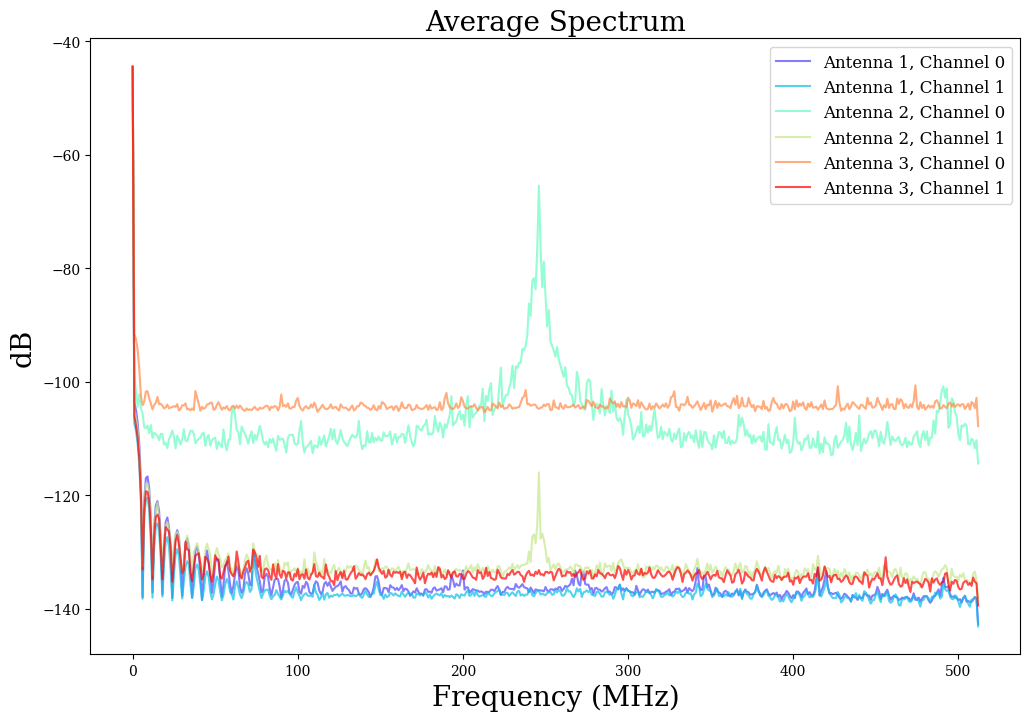

In [122]:
## Plotting the spectrum

from matplotlib import cm
plt.figure(figsize=(12,8))
colors=(cm.rainbow(np.linspace(0,1,12)))
i = 0

## Isolate channel and zoom!

for m in range(3):
    for n in range(2):
        for ibin in range(len(AverageSpectrum[0][0])):
            AverageSpectrum[m][n][ibin] = np.median(AverageSpectrum[m][n][ibin])
        c=colors[2*i + 1]
        print("On ant %0.1f, channel %0.1f."%(m+1, n))
        plt.plot(AverageSpectrum[m][n], color=c, alpha=0.7, label="Antenna {0}, Channel {1}".format(m + 1, n))
        i += 1

plt.legend(fontsize='large')
#plt.title('50 MHz', fontsize=25)
plt.xlabel('Frequency (MHz)', fontsize=20)
plt.ylabel('dB', fontsize=20)
plt.title('Average Spectrum', fontsize=20)

On ant 1.0, channel 0.0.
On ant 1.0, channel 1.0.
On ant 2.0, channel 0.0.
On ant 2.0, channel 1.0.
On ant 3.0, channel 0.0.
On ant 3.0, channel 1.0.


Text(0, 0.5, 'ADC bins')

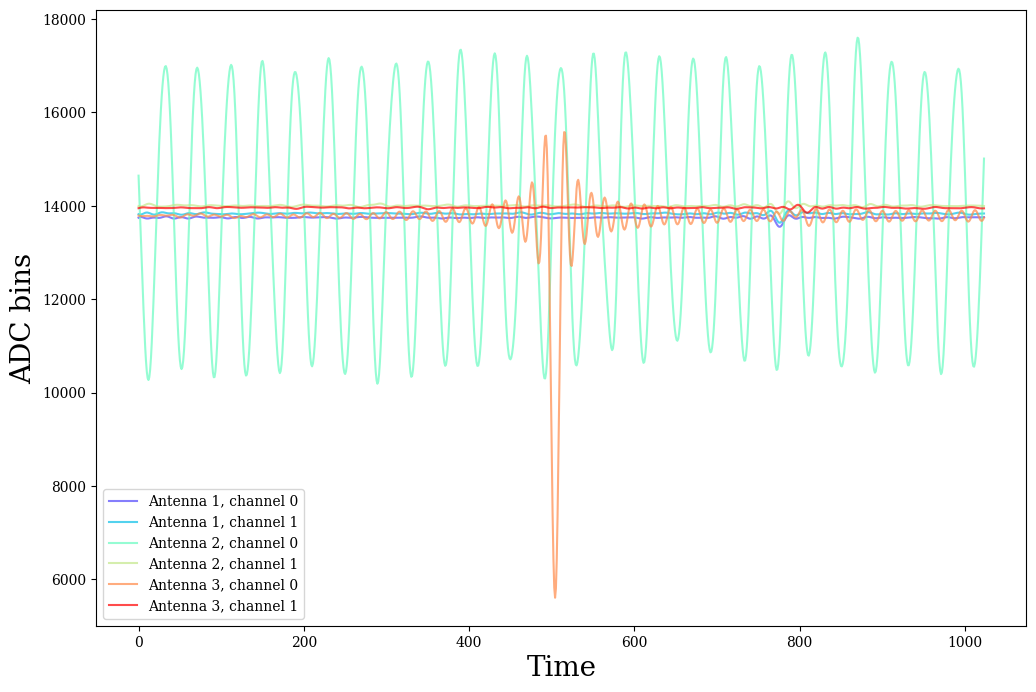

In [127]:
## Plotting in the time domain

plt.figure(figsize=(12,8))
colors=(cm.rainbow(np.linspace(0,1,12)))
i = 0

for m in range(3):
    for n in range(2):
        #for ibin in range(501):
            #AverageSpectrum[m][n][ibin] = np.median(AverageSpectrum[m][n][ibin])
        c=colors[2*i + 1]
        print("On ant %0.1f, channel %0.1f."%(m+1, n))
        plt.plot(TimeSeries[m][n][1][2], color=c, alpha=0.7, label="Antenna {0}, channel {1}".format(m + 1, n))
        i += 1

plt.legend()
#plt.title('95 MHz', fontsize=25)
plt.xlabel('Time', fontsize=20)
plt.ylabel('ADC bins', fontsize=20)

Text(0.5, 1.0, 'Single Trace From Ant2 Ch0, 200 MHz 500 mV')

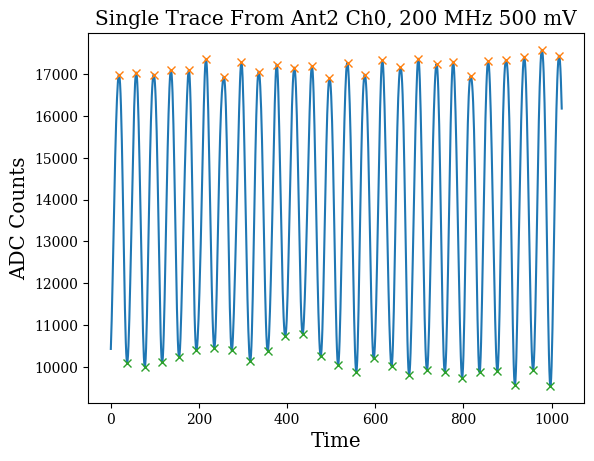

In [129]:
## Finding peak heights for TAXI calibration and plotting a sample

from scipy.signal import find_peaks

maxima, _ = find_peaks(TimeSeries[1][0][0][0], height=None)
minima, _ = find_peaks(-TimeSeries[1][0][0][0], height=None)
plt.plot(TimeSeries[1][0][0][0])
plt.plot(maxima, TimeSeries[1][0][0][0][maxima], "x")
plt.plot(minima, TimeSeries[1][0][0][0][minima], "x")
plt.xlabel('Time', fontsize='x-large')
plt.ylabel('ADC Counts', fontsize='x-large')
plt.title("Single Trace From Ant2 Ch0, 200 MHz 500 mV", fontsize='x-large')

In [49]:
## Code to take many peak-to-peak measurements with upsampling

def average_peak_height_upsampling(freq, path, num_traces):
    ## freq: string, desired frequency in MHz ex. '200'
    ## path: string, path to data
    ## num_traces: integer, ex. 100
    
    file_list = os.listdir(path)
    avg_list = []
    mV_list = []
    std = []
    
    for file in file_list:
        
        if file.split('.')[int(len(file.split('.'))-1)] == 'gz':
        
            if freq == file.split('_')[0].strip('MHz'):
                
                print("On file "+file+"...")
            
                difference_list = []
                
                tray = I3Tray()
                tray.AddModule("I3Reader", "Reader", FilenameList=['/data/user/ibrewer/taxi_data/07_12_23_Ant2_Ch0/'+file])
                tray.AddModule("TraceResampler", "Resampler",
                    InputName="RadioTAXIWaveform",
                    OutputName="ResampledVoltageMap",
                    ResampledBinning=0.125*I3Units.ns)
                tray.AddModule(AnalyzeTAXIData, "taxithing")
                tray.Execute()
                tray.Finish()
                
                avg = 0

                for i in range(num_traces):
                    maxima, _ = find_peaks(TimeSeries[1][0][0][i], height=None)
                    minima, _ = find_peaks(-TimeSeries[1][0][0][i], height=None)
                    
                    #print("Maxima has length %d" %len(maxima))
                    #print("Minima has length %d" %len(minima))

                    difference = np.abs(TimeSeries[1][0][0][i][maxima][:25] - TimeSeries[1][0][0][i][minima][:25])

                    avg += np.average(difference)
                    difference_list.append(difference)

                avg /= num_traces

                std.append(np.std(difference_list))
                avg_list.append(avg)
                mV_list.append(int(file.split("_")[1].split(".")[0].strip('mV')))
        
    return mV_list, avg_list, std

In [33]:
file_list = os.listdir('/data/user/ibrewer/taxi_data/07_12_23_Ant2_Ch0/')

In [50]:
mV_list, avg_list, std_list = average_peak_height_upsampling('200', '/data/user/ibrewer/taxi_data/07_12_23_Ant2_Ch0/', 100)

On file 200MHz_600mV.i3138418.i3.gz...


NOTICE (I3Tray): I3Tray finishing... (I3Tray.cxx:526 in void I3Tray::Execute(bool, unsigned int))


On file 200MHz_500mV.i3138418.i3.gz...


NOTICE (I3Tray): I3Tray finishing... (I3Tray.cxx:526 in void I3Tray::Execute(bool, unsigned int))


On file 200MHz_300mV.i3138418.i3.gz...


NOTICE (I3Tray): I3Tray finishing... (I3Tray.cxx:526 in void I3Tray::Execute(bool, unsigned int))


On file 200MHz_400mV.i3138418.i3.gz...


NOTICE (I3Tray): I3Tray finishing... (I3Tray.cxx:526 in void I3Tray::Execute(bool, unsigned int))


On file 200MHz_100mV.i3138418.i3.gz...


NOTICE (I3Tray): I3Tray finishing... (I3Tray.cxx:526 in void I3Tray::Execute(bool, unsigned int))


On file 200MHz_200mV.i3138418.i3.gz...


NOTICE (I3Tray): I3Tray finishing... (I3Tray.cxx:526 in void I3Tray::Execute(bool, unsigned int))


Text(0.5, 1.0, '200 MHz')

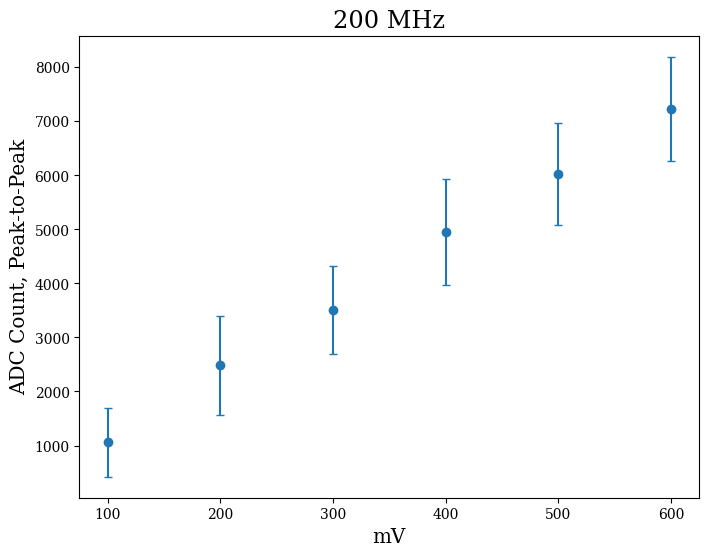

In [61]:
## Plotting ADC peak-to-peak v. mV

plt.figure(figsize=(8,6))
#plt.plot(mV_list, avg_list, 'o')
plt.errorbar(mV_list, avg_list, yerr=std_list, fmt='o', capsize=3)
plt.xlabel('mV', fontsize='x-large')
plt.ylabel('ADC Count, Peak-to-Peak', fontsize='x-large')
plt.title('200 MHz', fontsize='xx-large')

In [224]:
## Code to take many peak-to-peak measurements (WITHOUT upsampling)

def average_peak_height(freq, path, num_traces):
    
    file_list = os.listdir(path)
    avg_list = []
    mV_list = []
    
    for file in file_list:
        
        if freq == file.split('_')[0].strip('MHz'):

            data, rois, trace_lengths, rtc_times = taxi_tools.parse_bin_file(path+file, applyCorrections=False)
            data = taxi_tools.multievent_trace_tailor(data, rois, trace_lengths)
            avg = 0

            for i in range(num_traces):
                maxima, _ = find_peaks(data[i][1][0], height=None)
                minima, _ = find_peaks(-data[i][1][0], height=None)

                difference = np.abs(data[i][1][0][maxima[2:200]] - data[i][1][0][minima[2:200]])

                avg += np.average(difference)

            avg /= num_traces
            
            avg_list.append(avg)
            mV_list.append(int(file.split('_')[1].strip('mV.bin')))
        
    return mV_list, avg_list

In [225]:
volts, avgs = average_peak_height('200', '/data/user/ibrewer/taxi_data/07_12_23_Ant2_Ch0/', 100)

WARN (Python): Waveform length is zero, cannot run the tailor on this waveform! (taxi_tools.py:154 in antenna_tailor_stable)
WARN (Python): Waveform length is zero, cannot run the tailor on this waveform! (taxi_tools.py:154 in antenna_tailor_stable)
WARN (Python): Waveform length is zero, cannot run the tailor on this waveform! (taxi_tools.py:154 in antenna_tailor_stable)
WARN (Python): Waveform length is zero, cannot run the tailor on this waveform! (taxi_tools.py:154 in antenna_tailor_stable)
WARN (Python): Waveform length is zero, cannot run the tailor on this waveform! (taxi_tools.py:154 in antenna_tailor_stable)
WARN (Python): Waveform length is zero, cannot run the tailor on this waveform! (taxi_tools.py:154 in antenna_tailor_stable)
WARN (Python): Waveform length is zero, cannot run the tailor on this waveform! (taxi_tools.py:154 in antenna_tailor_stable)
WARN (Python): Waveform length is zero, cannot run the tailor on this waveform! (taxi_tools.py:154 in antenna_tailor_stable)


Text(0.5, 1.0, '200 MHz')

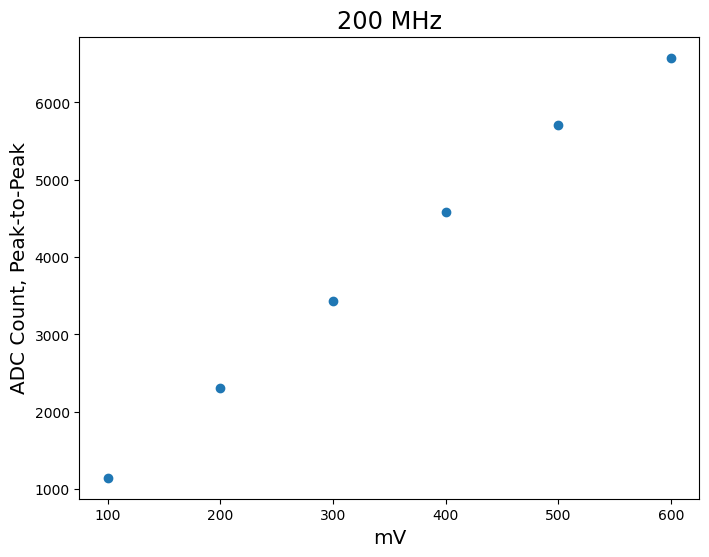

In [226]:
plt.figure(figsize=(8,6))
plt.plot(volts, avgs, 'o')
plt.xlabel('mV', fontsize='x-large')
plt.ylabel('ADC Count, Peak-to-Peak', fontsize='x-large')
plt.title('200 MHz', fontsize='xx-large')

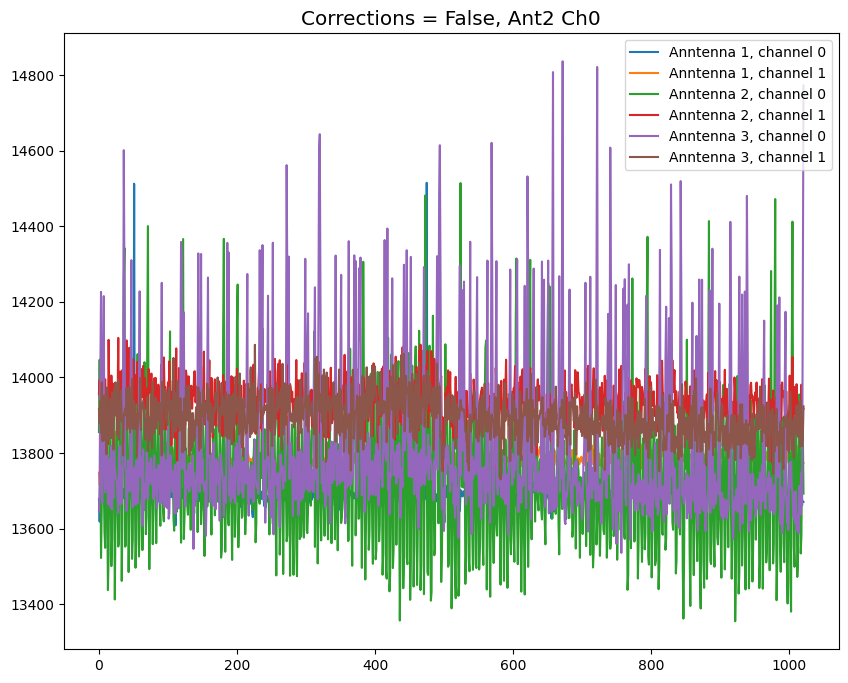

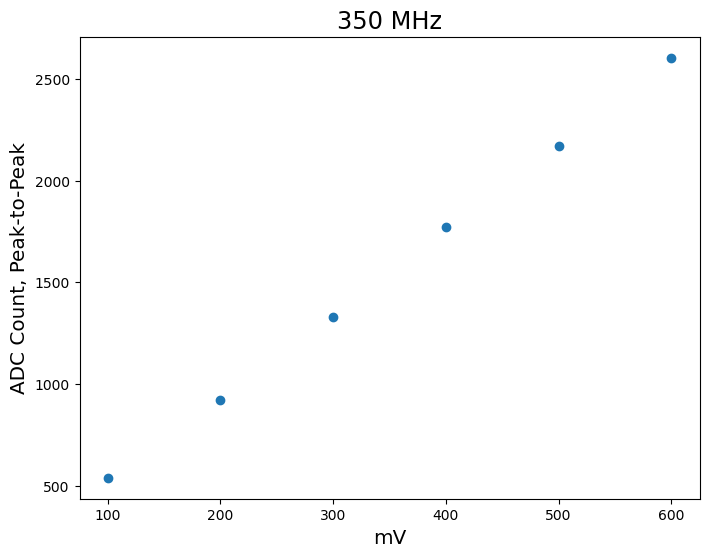

# Old code (may or not be useful)

Text(0.5, 1.0, 'Old Start_Radio')

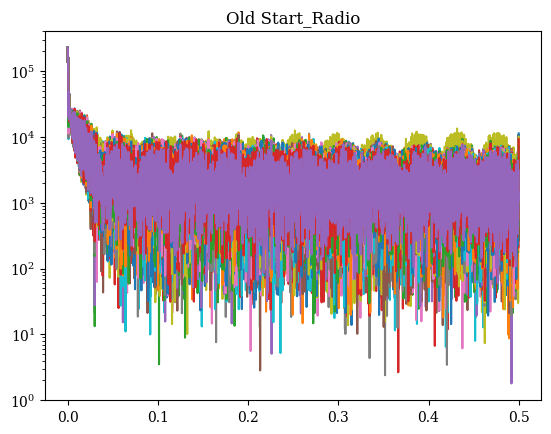

In [73]:
from icecube import dataclasses, radcube
times = np.linspace(0, data.shape[-1] - 1, data.shape[-1])
for ievt in range(len(data)): # event
    #for iant in range(len(data[ievt])): # antenna
        #for ich in range(len(data[ievt,iant])): # channel
    ts = radcube.PythonListToRadTrace(times, data[ievt,0,1].astype(float))
    fft = dataclasses.FFTData(ts)
    spec = fft.GetFrequencySpectrum()
    freqs, amps = radcube.RadTraceToPythonList(spec)
    plt.yscale("log") 
    plt.plot(freqs[1:], np.abs(amps)[1:]) # / I3Units.megahertz
    
plt.title("Old Start_Radio")

In [6]:
radio2i3_mine('skala/01_12_22/eventData_1642026299_2022-01-12_17-24-59.bin', 'eventData_1642026299_2022-01-12_17-24-59.bin)

TypeError: radio2i3_mine() missing 1 required positional argument: 'out_name'

In [56]:
import sys
sys.path.insert(1, '/home/ibrewer/work/icetray/src/taxi-reader')
from taxi_tools import *
import taxi_tools

In [42]:
h_waveforms, h_times, h_rois = get_waveform_array('/data/user/ibrewer/23_03_03/200MHz/200MHz_350mV.bin')

In [57]:
import sys
sys.path.insert(1, '/home/ibrewer/work/icetray/src/taxi-reader/modules')
from TaxiToI3Converter import TaxiToI3Converter

In [58]:
#from icecube import taxi_reader
#from icecube.taxi_reader import taxi_tools
from icecube import icetray, dataclasses
from icecube.icetray.i3logging import *
from icecube.icetray import I3Units
from I3Tray import *
#"skala/01_12_22/eventData_1642026299_2022-01-12_17-24-59.bin"
tray = I3Tray()
#tray.AddModule(I3Module,FilenameList=["eventData_1642026299_2022-01-12_17-24-59.bin"])
tray.AddModule(TaxiToI3Converter, 'converter', DataFile="/data/user/ibrewer/23_03_03/230MHz/230MHz_400mV.bin")
tray.AddModule("I3Writer", "i3writer", filename="/data/user/ibrewer/23_03_03/230MHz/230MHz_400mV.i3.gz", Streams=[icetray.I3Frame.DAQ])
tray.Execute()
tray.Finish()

#TaxiToI3Converter.Configure()

[327 328 330]
[459 460 462]
[1008 1016  505]
[116 118 120]
[664 665 667]
[797 797 800]
[320 160 161]
[453 453 456]
[1001 1001 1003]
[0 0 0]
[657 658 660]
[790 790 793]
[314 157 158]
[446 447 449]
[994 994 997]
[103  52  53]
[650 837 326]
[783 904 393]
[307 308 310]
[439 440 442]
[988 987 990]
[96 97 99]
[644 645 647]
[777 900 779]
[300 300 151]
[432 433 435]
[ 981 1002  491]
[89 45 46]
[637 638 640]
[770 770 772]
[293 294 297]
[426 427 429]
[974 974 976]
[83 83 86]
[630 827 316]
[763 764 766]
[286 287 290]
[419 210 211]
[967 967 970]
[76 76 79]
[623 824 313]
[756 757 759]
[280 280 283]
[412 413 415]
[960 992 481]
[69 69 72]
[617 617 620]
[749 887 376]
[273 274 276]
[405 407 408]
[954 989 478]
[62 63 65]
[224 225 227]
[357 179 180]
[905 905 907]
[14 14 16]
[561 793 282]
[694 695 697]
[217 218 221]
[0 0 0]
[0 0 0]
[898 961 450]
[7 4 5]
[554 555 557]
[687 688 690]
[210 211 214]
[344 345 347]
[891 891 894]
[0 0 1]
[547 548 550]
[681 681 684]
[204 102 103]
[337 168 170]
[885 884 887]
[1018 

In [147]:
ant1_rois, ant2_rois, ant3_rois = np.zeros(784), np.zeros(784), np.zeros(784)

for val in range(784):
    for nant in range(3):
        if nant == 0:
            ant1_rois[val] = h_rois[val][nant]
        if nant == 1:
            ant2_rois[val] = h_rois[val][nant]
        if nant == 2:
            ant3_rois[val] = h_rois[val][nant]

(array([ 9.,  8.,  9., 15., 11., 10., 11., 10., 13., 12., 10.,  8., 10.,
         8., 16.,  9.,  7., 12.,  8., 11., 14., 13., 10.,  8.,  8.,  5.,
         5., 11.,  5.,  5.,  6.,  4.,  5.,  7.,  4.,  5.,  4.,  5.,  6.,
         8.,  6.,  9.,  5.,  5.,  3.,  3.,  6.,  5.,  4.,  7.,  6.,  4.,
         6.,  4.,  6.,  5.,  4.,  3.,  4.,  5.,  6.,  6.,  8.,  4.,  5.,
         6.,  3.,  5.,  6.,  3.,  2.,  6.,  4.,  9.,  8., 11., 17.,  8.,
        11.,  9., 10., 11., 11.,  9.,  9.,  8., 16., 14.,  9.,  7.,  9.,
         9., 12., 11.,  6., 11., 11., 10., 10.,  9.]),
 array([   0.  ,   10.23,   20.46,   30.69,   40.92,   51.15,   61.38,
          71.61,   81.84,   92.07,  102.3 ,  112.53,  122.76,  132.99,
         143.22,  153.45,  163.68,  173.91,  184.14,  194.37,  204.6 ,
         214.83,  225.06,  235.29,  245.52,  255.75,  265.98,  276.21,
         286.44,  296.67,  306.9 ,  317.13,  327.36,  337.59,  347.82,
         358.05,  368.28,  378.51,  388.74,  398.97,  409.2 ,  419.43,
        

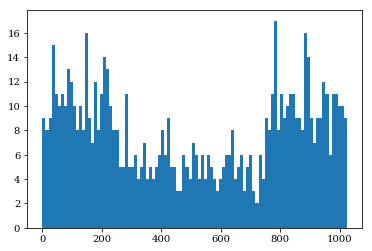

In [172]:
plt.hist(ant2_rois, bins=100)

In [154]:
h_waveforms_total = np.zeros((3,2,1024))

for val in range(784):
    for u in range(3):
        for v in range(8):
            if v % 4 == 0:
                new_v = int(v/4)
                h_waveforms_total[u][new_v] += h_waveforms[val][u][v]

h_waveforms_total /= 784

On ant 1.0, channel 0.0.
On ant 1.0, channel 1.0.
On ant 2.0, channel 0.0.
On ant 2.0, channel 1.0.
On ant 3.0, channel 0.0.
On ant 3.0, channel 1.0.


Text(0,0.5,'ADC bins (averaged)')

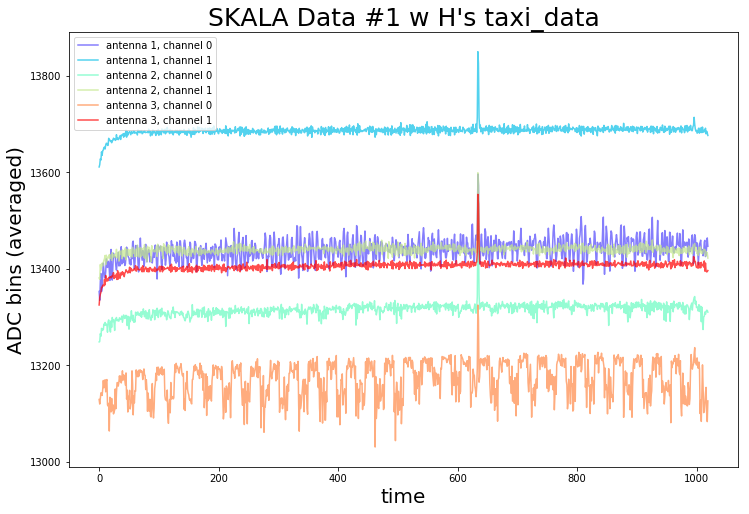

In [141]:
plt.figure(figsize=(12,8))
colors=(cm.rainbow(np.linspace(0,1,12)))
i = 0

for m in range(3):
    for n in range(2):
        c=colors[2*i + 1]
        print("On ant %0.1f, channel %0.1f."%(m+1, n))
        plt.plot(h_waveforms_total[m][n][2:1022], color=c, alpha=0.7, label="antenna {0}, channel {1}".format(m + 1, n))
        i += 1

plt.legend()
plt.title('SKALA Data #1 w H\'s taxi_data', fontsize=25)
plt.xlabel('time', fontsize=20)
plt.ylabel('ADC bins (averaged)', fontsize=20)

In [10]:
def radio2i3_mine(taxibin, out_name):
    import array
    year = 2021
    bin_data = array.array('H')
    bin_data.fromfile(open(taxibin, 'rb'), os.path.getsize(taxibin) // bin_data.itemsize)
    bin_data = np.array(bin_data)
    bin_data = bin_data[:9 * len(bin_data) // 9].reshape(-1, 9)
    n = np.sum(bin_data[:, 0] == 0x1000)
    #if n == 0: 
        #return None
    bin_data = bin_data[np.where(bin_data[:, 0] == 0x1000)[0][0]:]
    times = np.sum(bin_data[np.where(bin_data[:, 0] == 0x1000)[0], 4:8].astype(np.int64) << [48, 32, 16, 0], axis=1)

    event_starts = np.where(bin_data[:, 0] == 0x1000)[0]
    max_len = np.max(bin_data[np.where(bin_data[:, 0] == 0x1000), 3][0])
    event_list = bin_data[[np.arange(event_starts[i], event_starts[i] + max_len) for i in range(n - 1)]]

    data = -np.ones((n - 1, 3, 8, 1024), dtype=np.int16)
    rois = -np.ones((n - 1, 3), dtype=np.int16)
    trace_lenghts = -np.ones(n - 1, dtype=np.int16)
    expected_ordering = np.array([np.arange(0x4000, 0x4400), np.arange(0x4000, 0x4400) + 1024, np.arange(0x4000, 0x4400) + 2*1024]).T.flatten()

    for i in range(n-1):
        if np.all(event_list[i, 2:2 + 1024 * 3, 0] == expected_ordering):
            data[i] = np.moveaxis(event_list[i, 2:2 + 1024 * 3, 1:].reshape((1024, 3, 8)), 0, 2)
        elif np.all(event_list[i, 2:2 + 1024 * 3, 0][:-3] == expected_ordering[:-3]):
            data[i] = np.moveaxis(event_list[i, 2:2 + 1024 * 3, 1:].reshape((1024, 3, 8)), 0, 2)
            for j in range(3):
                if expected_ordering[-j] in event_list[i, :, 0]:
                    data[i, j, :, -1] = event_list[i, np.where(event_list[i, :, 0] == expected_ordering[-j])[0][0], 1:]
                else:
                    data[i, j, :, -1] = -1
        else:
            for j in range(0x4000, 0x4c00):
                if j in event_list[i, :, 0]:
                    drs4_id = (j & 0xc00) >> 10
                    bin_id = j & 0x3ff
                    data[i, drs4_id, :, bin_id] = event_list[i, np.where(event_list[i, :, 0] == j)[0][0], 1:]
        if 0xA000 in event_list[i, :, 0]:
            raw_roi = event_list[i, np.where(event_list[i, :, 0] == 0xA000)[0][0], 1:]
            high_bits = np.sum(np.unpackbits(raw_roi[0].astype(np.uint8)))
            if high_bits > 0:
                trace_lenghts[i] = 8/high_bits
            rois[i] = raw_roi[4:7] + 1024 * (np.ceil(np.log2(raw_roi[:3])).astype(int) - trace_lenghts[i])

    rtc2utc = make_conversion_function(taxibin)
    utctime = rtc2utc(times) + 8_999_989_090
    #soft_mask = get_soft_mask(utctime)

    out_file = dataio.I3File(out_name, 'w')
    for i in range(len(data)):
        frame = icetray.I3Frame(icetray.I3Frame.DAQ)
        frame['RadioTAXIWaveform'] = convert_event_to_i3(data[i])
        frame['RadioAntennaROI'] = dataclasses.I3VectorInt([r.item() for r in rois[i]])
        #print(np.array(frame['RadioAntennaROI']))
        frame['RadioTaxiTime'] = dataclasses.I3Time(year, int(utctime[i]))
        frame['RadioTraceLength'] = dataclasses.I3UInt64(int(np.abs(trace_lenghts[i]) * 1024))
        #frame['RadioSerdesDelay'] = dataclasses.I3UInt64(int(get_serdes_delay(frame['RadioTaxiTime'])))

        header = dataclasses.I3EventHeader()
        header.start_time = frame['RadioTaxiTime']
        header.end_time = frame['RadioTaxiTime'] + frame['RadioTraceLength'].value
        #if utctime[i] > 0:
            #header.run_id = get_runid_from_time(utctime[i])
        #else:
            #header.run_id = 0
        header.event_id = 0
        header.sub_event_stream = "TAXIStream"
        frame["I3EventHeader"] = header

        frame['SurfaceFilters'] = dataclasses.I3FilterResultMap()
        frame['SurfaceFilters']['radio_data'] = dataclasses.I3FilterResult()
        frame['SurfaceFilters']['radio_data'].condition_passed = True
        frame['SurfaceFilters']['IT_data'] = dataclasses.I3FilterResult()
        frame['SurfaceFilters']['scint_data'] = dataclasses.I3FilterResult()
        frame['SurfaceFilters']['soft_flag'] = dataclasses.I3FilterResult()
        #frame['SurfaceFilters']['soft_flag'].condition_passed = bool(soft_mask[i])

        out_file.push(frame)

    out_file.close()
    return frame

In [10]:
#file = open('2021_03_20.i3.gz',"r")
file = dataio.I3File('330MHz100mVSigGen.i3.gz', 'r')
frame = file.pop_frame()
frame.keys()
#for frame in file:

['TaxiTime',
 'TAXIRadioWaveform',
 'I3EventHeader',
 'TaxiTimeOffset',
 'AntennaROI']

In [8]:
#log_info("This function runs once per frame")

#thisROI = frame['RadioAntennaROI'].value  #This is the ROI for this event
#thisTime = frame["RadioTaxiTime"].value   #The RPC time in I3 units
from icecube.icetray import I3Units
from icecube.taxi_reader import taxi_tools

from I3Tray import *
from icecube import icetray, dataio, dataclasses, taxi_reader, radcube
from icecube.icetray.i3logging import *
from matplotlib import cm

AverageSpectrum = []

class AnalyzeTAXIData(icetray.I3Module):

    def __init__(self,ctx):
        icetray.I3Module.__init__(self,ctx)
        
    def Configure(self):

        self.NAntennas = 3
        self.NArms = 2
        self.NTimeBins = int(1024)
        self.NFreqBins = int(self.NTimeBins / 2 + 1)

        global AverageSpectrum
        AverageSpectrum = [[[[] for i in range(self.NFreqBins)] for i in range(self.NArms)] for i in range(self.NAntennas)]
#         np.zeros((self.NAntennas, self.NArms, self.NFreqBins))
#       
        global AverageTimeSeries
        AverageTimeSeries = np.zeros((self.NAntennas, self.NArms, self.NTimeBins))
        
        self.NEntries = 0
        self.df = -1

        self.verbose = False

    def DAQ(self, frame):
        #thisROI = frame['AntennaROI']
        #thisTime = frame["TaxiTime"]
        antennaDataMap = frame['RadioTAXIWaveform'] #This is a container that holds all the antenna info
        
        self.NEntries += 1.
        
        for iant, antkey in enumerate(antennaDataMap.keys()):
            if self.verbose:
                print("Working on antenna for antkey "+str(antkey))

            channelMap = antennaDataMap[antkey] #This container holds all information for one antenna

            for ichannel, chkey in enumerate(channelMap.keys()): #Each antenna arm is one "channel"
                #if self.verbose:
                    #print("Working on channel "+str(chkey))

                fft = channelMap[ichannel].GetFFTData() #This container holds time series and spectrum

                #ts = fft.GetTimeSeries()
                #ts *= taxi_reader.taxi_tools.get_volts_per_ADC_bin()
                #fft.LoadTimeSeries(ts.GetSubset(0, self.NTimeBins - 1))
                
                #################
                ##Analyze the time series
                #################
                timeSeries = fft.GetTimeSeries()  #Get the time series for this antenna
#               timeSeries  *= taxi_tools.get_volts_per_ADC_bin() #Convert it from ADC bins to volts!

#               #Get just a chunk of the time series, skip the first time bin
                timeSeries = timeSeries.GetSubset(0, self.NTimeBins - 1)
                fft.LoadTimeSeries(timeSeries)

#               #Let's first remove the offset
                #truncatedTimeSeries -= radcube.GetMean(timeSeries)
#               #log_info("Analyzing time series with length {0} bins, mean value {1:0.2f} [mV], and RMS of {2:0.02f} [mV]"\
#               #.format(len(truncatedTimeSeries), meanValueInmV, rmsValueInmV))

#               #Convert to python list of times and amplitudes
                binTimes, pythonTimeWaveform = radcube.RadTraceToPythonList(timeSeries)

                AverageTimeSeries[iant][ichannel] += np.array(pythonTimeWaveform)

                #################
                ##Analyze the spectrum
                #################
                spectrum = fft.GetFrequencySpectrum()
                spectrum *= taxi_reader.taxi_tools.get_volts_per_ADC_bin()
                self.df = spectrum.binning #We will need this for later

                truncatedFreqSpec = spectrum.GetSubset(0, self.NFreqBins-1)
                freqs, pythonWaveform = radcube.RadTraceToPythonList(truncatedFreqSpec)

                #we don't care about the phases, so cast as magnitude
                pythonWaveform = np.abs(pythonWaveform)

                for i, val in enumerate(pythonWaveform):
                    dbmHz = radcube.GetDbmHzFromFourierAmplitude(pythonWaveform[i], self.df, 50*I3Units.ohm)
                    AverageSpectrum[iant][ichannel][i].append(dbmHz)

                #self.AverageSpectrum /= self.NEntries
                #self.AverageTimeSeries /= self.NEntries

                
                    

In [60]:
tray = I3Tray()

tray.AddModule("I3Reader", "reader", FilenameList=["/data/user/ibrewer/23_03_03/230MHz/230MHz_400mV.i3.gz"])
tray.AddModule(AnalyzeTAXIData, "taxithing")

tray.Execute(1000)
tray.Finish()

# self = icetray.I3Module
# AnalyzeTAXIData.Configure()
# file = dataio.I3File('2021_03_20.i3.gz', 'r')
# for frame in file:
#     AnalyzeTAXIData.DAQ(self, frame)
#     if self.NEntries == 1000:
#         break
#log scale

In [61]:
AverageTimeSeries /= 1000

On ant 1.0, channel 0.0.
On ant 1.0, channel 1.0.
On ant 2.0, channel 0.0.
On ant 2.0, channel 1.0.
On ant 3.0, channel 0.0.
On ant 3.0, channel 1.0.


Text(0,0.5,'ADC bins')

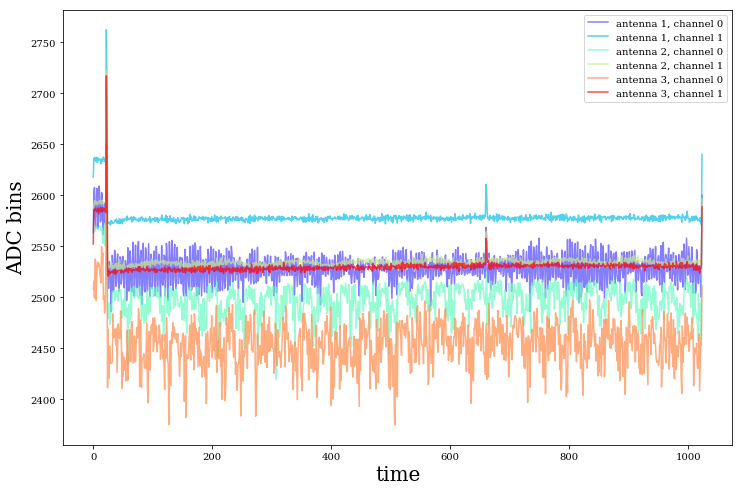

In [62]:
plt.figure(figsize=(12,8))
colors=(cm.rainbow(np.linspace(0,1,12)))
i = 0

for m in range(3):
    for n in range(2):
        #for ibin in range(501):
            #AverageSpectrum[m][n][ibin] = np.median(AverageSpectrum[m][n][ibin])
        c=colors[2*i + 1]
        print("On ant %0.1f, channel %0.1f."%(m+1, n))
        plt.plot(AverageTimeSeries[m][n], color=c, alpha=0.7, label="antenna {0}, channel {1}".format(m + 1, n))
        i += 1

plt.legend()
#plt.title('95 MHz', fontsize=25)
plt.xlabel('time', fontsize=20)
plt.ylabel('ADC bins', fontsize=20)
#plt.ylim(6600,8700)
#plt.savefig('taxi_data/no_cascading/02_07_22_ant1_ch0_1_timeseries.png')

On ant 1.0, channel 0.0.
On ant 1.0, channel 1.0.
On ant 2.0, channel 0.0.
On ant 2.0, channel 1.0.
On ant 3.0, channel 0.0.
On ant 3.0, channel 1.0.


Text(0,0.5,'dB (log scale)')

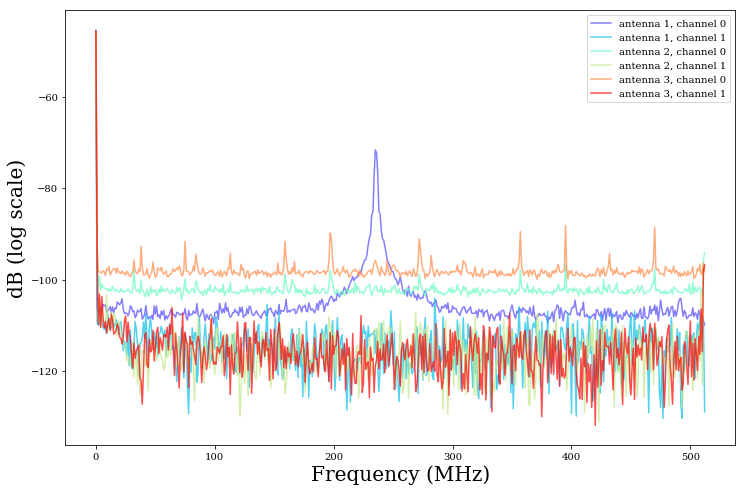

In [63]:
# self.AverageSpectrum / self.NEntries
plt.figure(figsize=(12,8))
colors=(cm.rainbow(np.linspace(0,1,12)))
i = 0

## Isolate channel and zoom!

for m in range(3):
    for n in range(2):
        for ibin in range(len(AverageSpectrum[0][0])):
            AverageSpectrum[m][n][ibin] = np.median(AverageSpectrum[m][n][ibin])
        c=colors[2*i + 1]
        print("On ant %0.1f, channel %0.1f."%(m+1, n))
        plt.plot(AverageSpectrum[m][n], color=c, alpha=0.7, label="antenna {0}, channel {1}".format(m + 1, n))
        i += 1

plt.legend()
#plt.title('50 MHz', fontsize=25)
plt.xlabel('Frequency (MHz)', fontsize=20)
plt.ylabel('dB (log scale)', fontsize=20)
#plt.ylim(-130,-93)
#plt.savefig('taxi_data/no_cascading/02_07_22_ant1_ch0_1_spectrum.png')

In [42]:
file_1 = open("taxi_data/bin_spike_data.txt", 'r')

In [43]:
file_2 = open("taxi_data/bin_spike_02_07_22_cascading.txt", 'r')

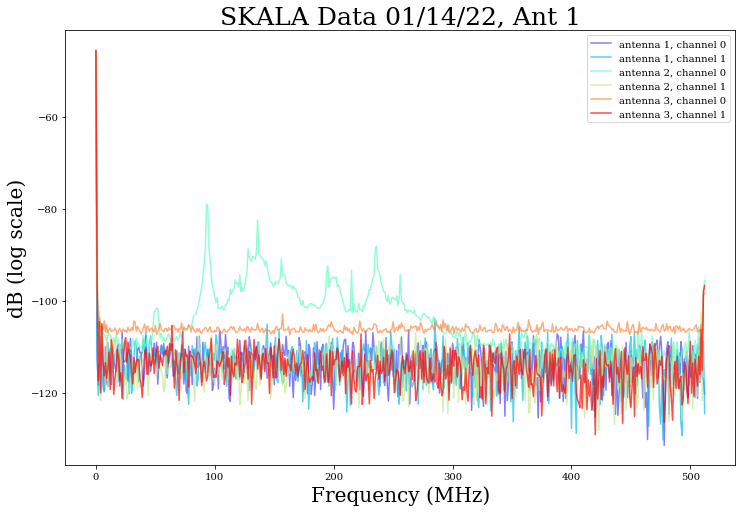

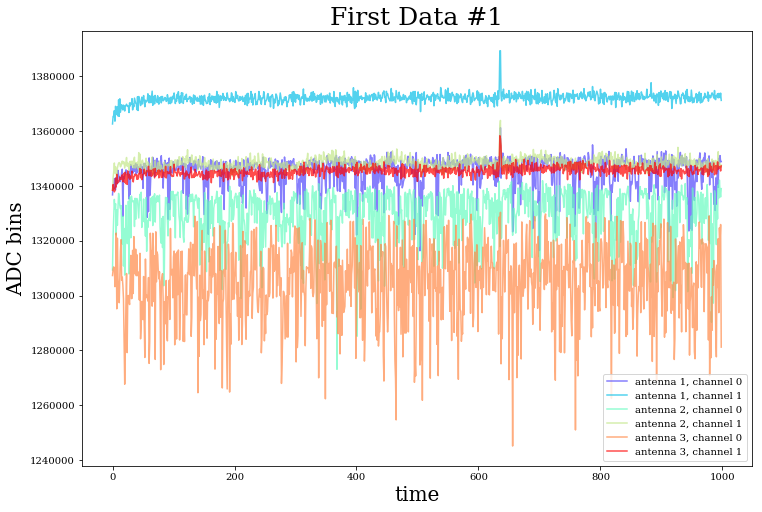


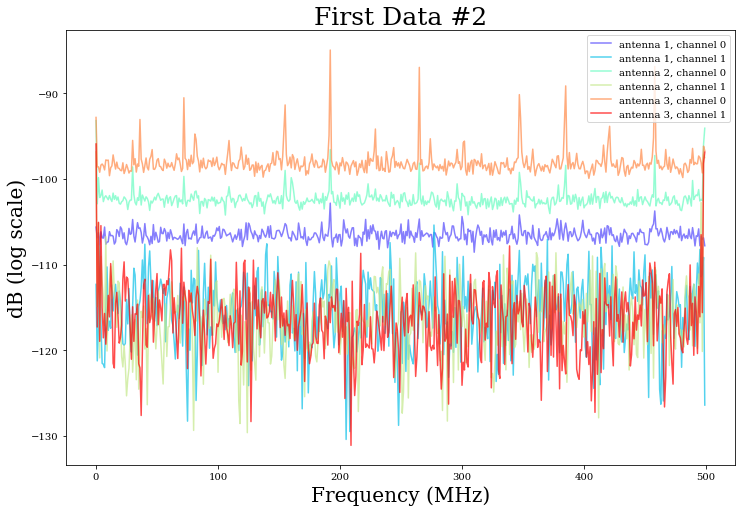

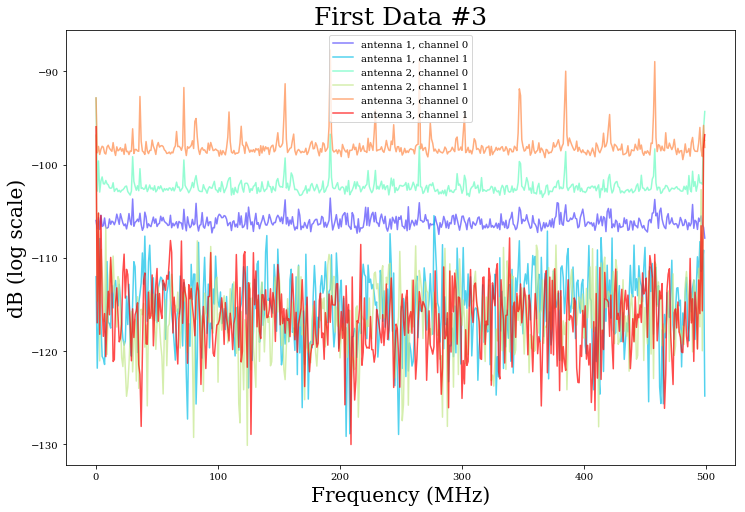

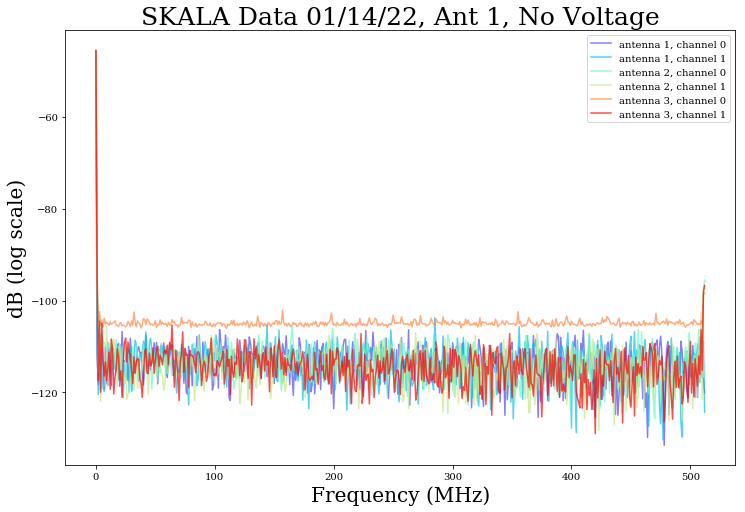